# Reconstruction with TomoPy

Here is an example of how to use the gridrec <cite data-cite="Dowd:99">(Dowd, 2019)</cite> reconstruction
algorithm with [TomoPy](https://tomopy.readthedocs.io/en/latest) <cite data-cite="Gursoy:14a">(Gursoy, 2014)</cite>.

First [install](https://tomopy.readthedocs.io/en/latest/install.html) TomoPy.

In [1]:
import tomopy

Tomographic data input in TomoPy is supported by [DXchange](https://dxchange.readthedocs.io).

In [2]:
import dxchange

[Matplotlib](https://matplotlib.org/) provides plotting of the result in this notebook. [Paraview](https://www.paraview.org) or other tools are available for more sophisticated 3D rendering.

In [3]:
import matplotlib.pyplot as plt

Import and activate Python's built in logging module if desired. It may print something helpful.

In [4]:
import logging
logging.basicConfig(level=logging.INFO)

This [data set](../../../source/tomopy/data/tooth.h5) file format follows the [APS](http://www.aps.anl.gov) beamline [2-BM and 32-ID](https://www1.aps.anl.gov/Imaging) [data-exchange](https://dxfile.readthedocs.io) definition. Other file format readers for other synchrotrons are also available with [DXchange](https://dxchange.readthedocs.io/en/latest/source/api/dxchange.exchange.html).

In [5]:
proj, flat, dark, theta = dxchange.read_aps_32id(
    fname='../../../source/tomopy/data/tooth.h5',
    sino=(0, 2),  # Select the sinogram range to reconstruct.
)

INFO:dxchange.reader:Data successfully imported: /home/dching/Documents/tomopy/source/tomopy/data/tooth.h5
INFO:dxchange.reader:Data successfully imported: /home/dching/Documents/tomopy/source/tomopy/data/tooth.h5
INFO:dxchange.reader:Data successfully imported: /home/dching/Documents/tomopy/source/tomopy/data/tooth.h5
INFO:dxchange.reader:Data successfully imported: /home/dching/Documents/tomopy/source/tomopy/data/tooth.h5


Plot the sinogram

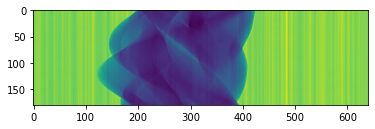

In [6]:
plt.imshow(proj[:, 0, :])
plt.show()

If the angular information is not avaialable from the raw data you need to set the data collection angles. In this case, `theta` is set as equally spaced between 0-180 degrees.

In [7]:
if theta is None:
    theta = tomopy.angles(proj.shape[0])

Perform the flat-field correction of raw data: $$ \frac{proj - dark} {flat - dark} $$

In [8]:
proj = tomopy.normalize(proj, flat, dark)

Calculate $ -log(proj) $ to linearize transmission tomography data.


In [9]:
proj = tomopy.minus_log(proj)

Tomopy provides various methods (<cite data-cite="Donath:06">Donath:06</cite>, <cite data-cite=Vo:14>Vo:14</cite>,
<cite data-cite="Guizar:08">Guizar:08</cite>) to [find the rotation center](http://tomopy.readthedocs.io/en/latest/api/tomopy.recon.rotation.html).

In [10]:
rot_center = tomopy.find_center(proj, theta, init=290, ind=0, tol=0.5)

INFO:tomopy.recon.rotation:Trying rotation center: [290.]
INFO:tomopy.recon.rotation:Function value = 2.014651
INFO:tomopy.recon.rotation:Trying rotation center: [304.5]


Reconstructing 1 slice groups with 1 master threads...
Reconstructing 1 slice groups with 1 master threads...
Reconstructing 1 slice groups with 1 master threads...


INFO:tomopy.recon.rotation:Function value = 2.076837
INFO:tomopy.recon.rotation:Trying rotation center: [275.5]
INFO:tomopy.recon.rotation:Function value = 2.259117
INFO:tomopy.recon.rotation:Trying rotation center: [297.25]
INFO:tomopy.recon.rotation:Function value = 1.920647
INFO:tomopy.recon.rotation:Trying rotation center: [304.5]


Reconstructing 1 slice groups with 1 master threads...
Reconstructing 1 slice groups with 1 master threads...
Reconstructing 1 slice groups with 1 master threads...


INFO:tomopy.recon.rotation:Function value = 2.076837
INFO:tomopy.recon.rotation:Trying rotation center: [293.625]
INFO:tomopy.recon.rotation:Function value = 1.939667
INFO:tomopy.recon.rotation:Trying rotation center: [300.875]
INFO:tomopy.recon.rotation:Function value = 1.997986
INFO:tomopy.recon.rotation:Trying rotation center: [295.4375]


Reconstructing 1 slice groups with 1 master threads...
Reconstructing 1 slice groups with 1 master threads...
Reconstructing 1 slice groups with 1 master threads...


INFO:tomopy.recon.rotation:Function value = 1.908336
INFO:tomopy.recon.rotation:Trying rotation center: [293.625]
INFO:tomopy.recon.rotation:Function value = 1.939667
INFO:tomopy.recon.rotation:Trying rotation center: [296.34375]
INFO:tomopy.recon.rotation:Function value = 1.906685
INFO:tomopy.recon.rotation:Trying rotation center: [297.25]


Reconstructing 1 slice groups with 1 master threads...
Reconstructing 1 slice groups with 1 master threads...
Reconstructing 1 slice groups with 1 master threads...


INFO:tomopy.recon.rotation:Function value = 1.920647
INFO:tomopy.recon.rotation:Trying rotation center: [295.890625]
INFO:tomopy.recon.rotation:Function value = 1.906942


Reconstructing 1 slice groups with 1 master threads...


Reconstruct using the gridrec algorithm. Tomopy provides various [reconstruction](http://tomopy.readthedocs.io/en/latest/api/tomopy.recon.algorithm.html) and provides wrappers for other libraries such as the [ASTRA toolbox](https://sourceforge.net/p/astra-toolbox/wiki/Home/).

In [11]:
recon = tomopy.recon(proj, theta, center=rot_center, algorithm='gridrec', sinogram_order=False)

Reconstructing 2 slice groups with 2 master threads...


Mask each reconstructed slice with a circle.

In [12]:
recon = tomopy.circ_mask(recon, axis=0, ratio=0.95)

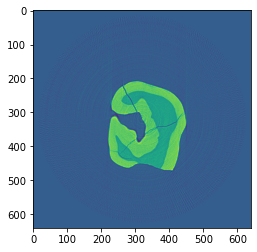

In [13]:
plt.imshow(recon[0, :, :])
plt.show()